<a href="https://colab.research.google.com/github/Luis-QT/Regresion-Lineal-ML/blob/main/Regresi%C3%B3n_Lineal_Precios_de_casas_con_pies_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
! git clone https://github.com/Luis-QT/Regresion-Lineal-ML.git

Cloning into 'Regresion-Lineal-ML'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 40 (delta 14), reused 11 (delta 3), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [86]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [87]:
path = './Regresion-Lineal-ML'
os.listdir('./Regresion-Lineal-ML/data')

['kc_house_train_data.csv',
 'Philadelphia_Crime_Rate.csv',
 'kc_house_test_data.csv',
 'kc_house_data.csv']

In [88]:
df = pd.read_csv(f'{path}/data/kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Distribuyendo datos de prueba y entrenamiento

In [114]:
df_train = pd.read_csv(f'{path}/data/kc_house_train_data.csv')
df_test = pd.read_csv(f'{path}/data/kc_house_test_data.csv')
X_train = df_train['sqft_living'].values.reshape(len(df_train), 1)
X_test = df_test['sqft_living'].values.reshape(len(df_test), 1)
y_train = df_train['price'].values
y_test = df_test['price'].values

### Predicción del precio en base al tamaño del lote

Lo siguiente será observar la correlación entre el tamaño del lote y el precio

In [115]:
X_train.shape, y_train.shape

((17384, 1), (17384,))

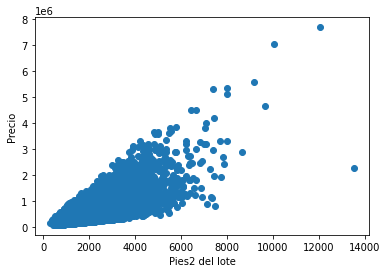

In [116]:
plt.scatter(X_train, y_train)
plt.xlabel('Pies2 del lote')
plt.ylabel('Precio')
plt.show()

A médida de ejercicio, probaremos la regresión lineal simple

In [117]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.4940914013649541

In [118]:
print(f'La pendiente es {model.coef_} y el interceptor es {model.intercept_}')

La pendiente es [281.95883963] y el interceptor es -47116.07907289383


In [119]:
(800000 - model.intercept_)/model.coef_

array([3004.39624515])

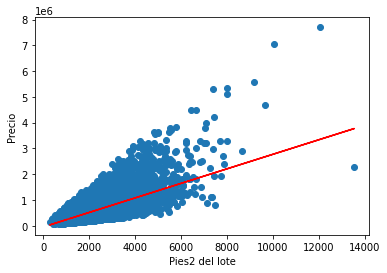

In [120]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), 'r')
plt.xlabel('Pies2 del lote')
plt.ylabel('Precio')
plt.show()

In [121]:
# Con los datos de prueba
model.score(X_test, y_test)

0.4872491184162604

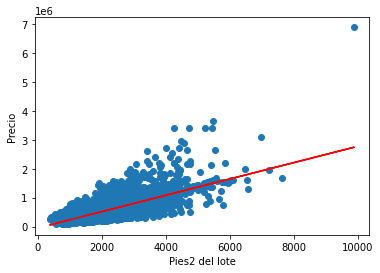

In [122]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), 'r')
plt.xlabel('Pies2 del lote')
plt.ylabel('Precio')
plt.show()

In [123]:
model.predict([[2650]])

array([700074.84594751])

In [124]:
model.score(X_train, y_train)

0.4940914013649541

In [125]:
from sklearn.metrics import mean_squared_error

In [126]:
mean_squared_error(y_train, model.predict(X_train))

69139343889.62741

In [127]:
np.sum(np.square(model.predict(X_test) - y_test))

275402933617812.12

## Predicción del precio en base al Nº de habitaciones

In [108]:
df_train = pd.read_csv(f'{path}/data/kc_house_train_data.csv')
df_test = pd.read_csv(f'{path}/data/kc_house_test_data.csv')
X_train = df_train['bedrooms'].values.reshape(len(df_train), 1)
X_test = df_test['bedrooms'].values.reshape(len(df_test), 1)
y_train = df_train['price'].values
y_test = df_test['price'].values

In [109]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.09787065250401628

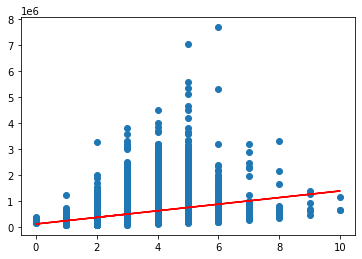

In [110]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), 'r')
plt.show()

In [111]:
# Con datos de test
model.score(X_test, y_test)

0.08144360312297161

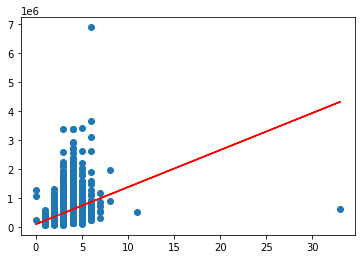

In [112]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), 'r')
plt.show()

In [113]:
np.sum(np.square(model.predict(X_test) - y_test))

493364585960300.9

In [128]:
493364585960300.9 - 275402933617812.12

217961652342488.75